In [1]:
#STEP 1: SET ENVIRONMENT (pip install numpy pandas scikit-learn tensorflow matplotlib seaborn statsmodels)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

        ID  Social Studies  Integrated Science  English Language  Mathematics  \
0  STU0001              60                82.0             70.00         50.0   
1  STU0002              70                72.0             76.67         52.0   
2  STU0003              85                78.0             90.00         50.0   
3  STU0004             100                85.0             66.67         50.0   
4  STU0005              82                75.0             76.67         50.0   

   Final_CGPA  
0        3.32  
1        3.48  
2        3.85  
3        3.87  
4        3.68   
 

ID                    0
Social Studies        0
Integrated Science    0
English Language      0
Mathematics           0
Final_CGPA            0
dtype: int64 
 

       Social Studies  Integrated Science  English Language  Mathematics  \
count     1010.000000         1010.000000       1010.000000  1010.000000   
mean        63.177228           58.918257         54.125723    62.443861   
std         12.534404   

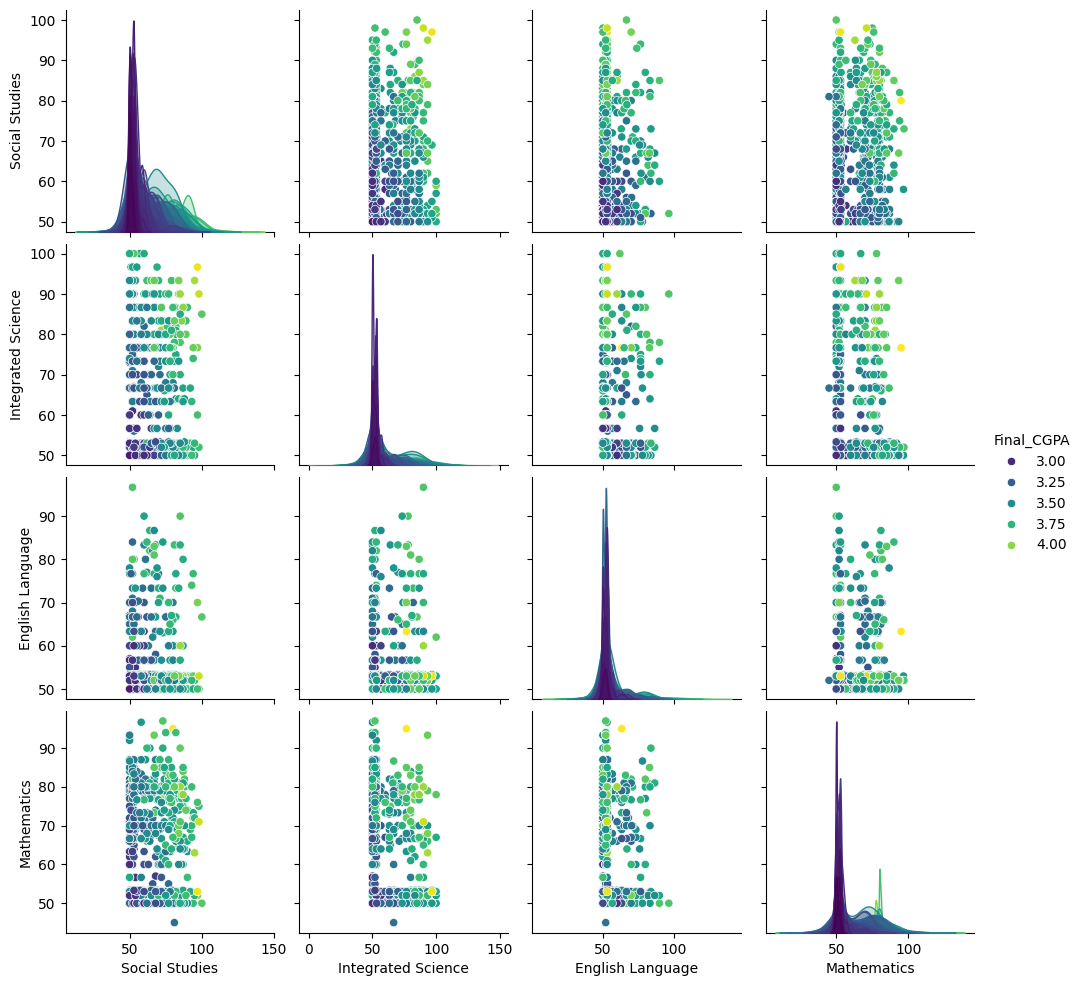

In [2]:
#STEP 2: Data Loading & Exploration (Load the dataset (CSV/Excel) and explore)

# Load data
df = pd.read_csv('Dataset.csv')

# Display first 5 rows
print(df.head(),'\n','\n')

# Check for missing values
print(df.isnull().sum(),'\n','\n')

# Summary statistics
print(df.describe(),'\n','\n')

# Visualize distributions

sns.pairplot(df[['Social Studies','Integrated Science','English Language','Mathematics','Final_CGPA']], hue='Final_CGPA', 
             palette="viridis")
plt.show()

In [3]:
# STEP 3: Data Preprocessing 

# 3.1 Handle Missing Data - Only for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3.2 Encode Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # ✅ fixed for sklearn >= 1.2
    encoded_features = encoder.fit_transform(df[categorical_cols])
    df_encoded = pd.concat(
        [df.drop(categorical_cols, axis=1), 
         pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)],
        axis=1
    )
else:
    df_encoded = df.copy()

# 3.3 Define Features (X) and Target (y)
X = df_encoded.drop('Final_CGPA', axis=1)   # Features
y = df_encoded['Final_CGPA']                # Target

# 3.4 Train-Test Split (only ONCE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.5 Scale Features (only for ANN)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete!")
print("Shapes ->")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop("Final_CGPA", axis=1)   # predictors
y = df["Final_CGPA"]                # target

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Preprocessing complete!
Shapes ->
X_train: (808, 1013), X_test: (202, 1013)
X_train_scaled: (808, 1013), X_test_scaled: (202, 1013)
Train shape: (808, 5)
Test shape: (202, 5)


Original data shapes:
X_train shape: (808, 5)
y_train shape: (808,)
X_test shape: (202, 5)
y_test shape: (202,)

Data types in X_train:
ID                     object
Social Studies          int64
Integrated Science    float64
English Language      float64
Mathematics           float64
dtype: object

Data types in y_train:
float64

Missing values in original X_train:
ID                    0
Social Studies        0
Integrated Science    0
English Language      0
Mathematics           0
dtype: int64

Missing values in original y_train:
0

After conversion - X_train shape: (808, 5)
NaN values in X_train after conversion: 808

NaN counts per column:
ID                    808
Social Studies          0
Integrated Science      0
English Language        0
Mathematics             0
dtype: int64

Dropped columns: ['ID']
X_train shape after dropping high-NaN columns: (808, 4)
y_train NaN values: 0

Final shapes after alignment:
X_train_final shape: (808, 4)
y_train_final shape: (808,)
            

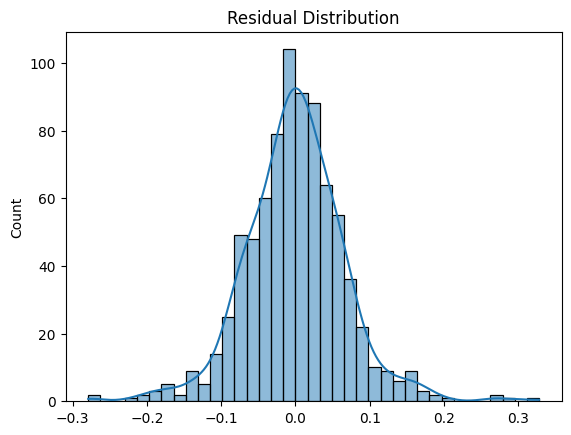

MLR R²: 0.930
MLR MAE: 0.051
MLR RMSE: 0.071


In [4]:
# First, let's thoroughly examine your data
print("Original data shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nData types in X_train:")
print(X_train.dtypes)

print("\nData types in y_train:")
print(y_train.dtype)

# Check for missing values in original data
print("\nMissing values in original X_train:")
print(X_train.isnull().sum())

print("\nMissing values in original y_train:")
print(y_train.isnull().sum())

# Let's try a more careful approach to cleaning
# Convert to numeric without immediately dropping NaNs
X_train_numeric = X_train.copy()
for col in X_train_numeric.columns:
    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col], errors='coerce')

y_train_numeric = pd.to_numeric(y_train, errors='coerce')

print(f"\nAfter conversion - X_train shape: {X_train_numeric.shape}")
print(f"NaN values in X_train after conversion: {X_train_numeric.isnull().sum().sum()}")

# Check which columns have too many NaN values
nan_counts = X_train_numeric.isnull().sum()
print("\nNaN counts per column:")
print(nan_counts)

# Instead of dropping all rows with any NaN, let's be more selective
# Option 1: Drop columns with too many NaN values (e.g., >50%)
columns_to_drop = nan_counts[nan_counts > len(X_train_numeric) * 0.5].index
X_train_clean = X_train_numeric.drop(columns=columns_to_drop)

print(f"\nDropped columns: {list(columns_to_drop)}")
print(f"X_train shape after dropping high-NaN columns: {X_train_clean.shape}")

# Option 2: Impute remaining NaN values with column means
from sklearn.impute import SimpleImputer

# Impute NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean), 
                              columns=X_train_clean.columns,
                              index=X_train_clean.index)

# Also handle y_train NaN values
y_train_clean = y_train_numeric.dropna()
print(f"y_train NaN values: {y_train_numeric.isnull().sum()}")

# Make sure indices align
common_idx = X_train_imputed.index.intersection(y_train_clean.index)
X_train_final = X_train_imputed.loc[common_idx]
y_train_final = y_train_clean.loc[common_idx]

print(f"\nFinal shapes after alignment:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train_final shape: {y_train_final.shape}")

# Check if we have any data left
if len(X_train_final) == 0 or len(y_train_final) == 0:
    print("ERROR: No data remaining after cleaning!")
    print("Please check your original data for severe issues.")
else:
    #4.1 Train MLR Model
    # Using statsmodels for detailed regression analysis
    X_train_sm = sm.add_constant(X_train_final)  # Adds intercept term
    model_sm = sm.OLS(y_train_final, X_train_sm).fit()
    print(model_sm.summary())

    #4.2 Check Assumptions
    # Multicollinearity (VIF)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train_final.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_final.values, i) 
                      for i in range(X_train_final.shape[1])]
    print(vif_data)

    # Residual Analysis
    residuals = model_sm.resid
    sns.histplot(residuals, kde=True)
    plt.title("Residual Distribution")
    plt.show()

    #4.3 Evaluate MLR
    # Also clean and prepare test data
    X_test_numeric = X_test.copy()
    for col in X_test_numeric.columns:
        X_test_numeric[col] = pd.to_numeric(X_test_numeric[col], errors='coerce')
    
    X_test_clean = X_test_numeric.drop(columns=columns_to_drop, errors='ignore')
    X_test_imputed = pd.DataFrame(imputer.transform(X_test_clean), 
                                 columns=X_test_clean.columns,
                                 index=X_test_clean.index)
    
    y_test_numeric = pd.to_numeric(y_test, errors='coerce')
    y_test_clean = y_test_numeric.dropna()
    
    # Predictions
    X_test_sm = sm.add_constant(X_test_imputed)
    y_pred_mlr = model_sm.predict(X_test_sm)

    # Align test predictions with actual values
    test_common_idx = X_test_imputed.index.intersection(y_test_clean.index)
    y_test_final = y_test_clean.loc[test_common_idx]
    y_pred_final = y_pred_mlr.loc[test_common_idx]

    # Metrics
    mlr_r2 = r2_score(y_test_final, y_pred_final)
    mlr_mae = mean_absolute_error(y_test_final, y_pred_final)
    mlr_rmse = np.sqrt(mean_squared_error(y_test_final, y_pred_final))

    print(f"MLR R²: {mlr_r2:.3f}")
    print(f"MLR MAE: {mlr_mae:.3f}")
    print(f"MLR RMSE: {mlr_rmse:.3f}")

Training ANN...
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 10.0020 - mae: 3.1507 - val_loss: 8.4424 - val_mae: 2.8984 - learning_rate: 0.0010
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6122 - mae: 2.5509 - val_loss: 4.1944 - val_mae: 2.0451 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.1888 - mae: 1.3713 - val_loss: 0.5130 - val_mae: 0.6224 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5766 - mae: 0.6093 - val_loss: 0.2428 - val_mae: 0.4132 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4395 - mae: 0.5193 - val_loss: 0.3032 - val_mae: 0.4550 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4283 - mae: 0.5250 - val_loss: 0.2489 - val_mae: 0.4075 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3787 - mae: 0.4930 - val_loss: 0.2051 - val_mae: 0.3679 - learning_ra

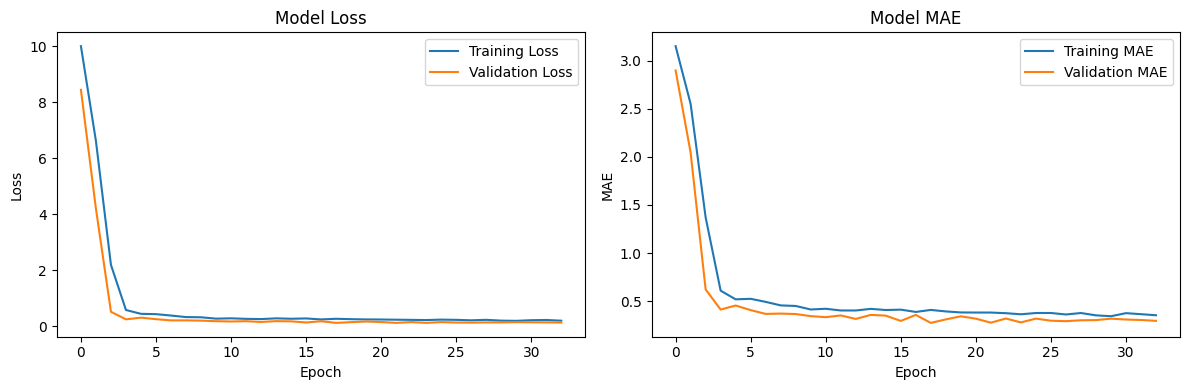

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ANN R²: -0.695
ANN MAE: 0.295
ANN RMSE: 0.349


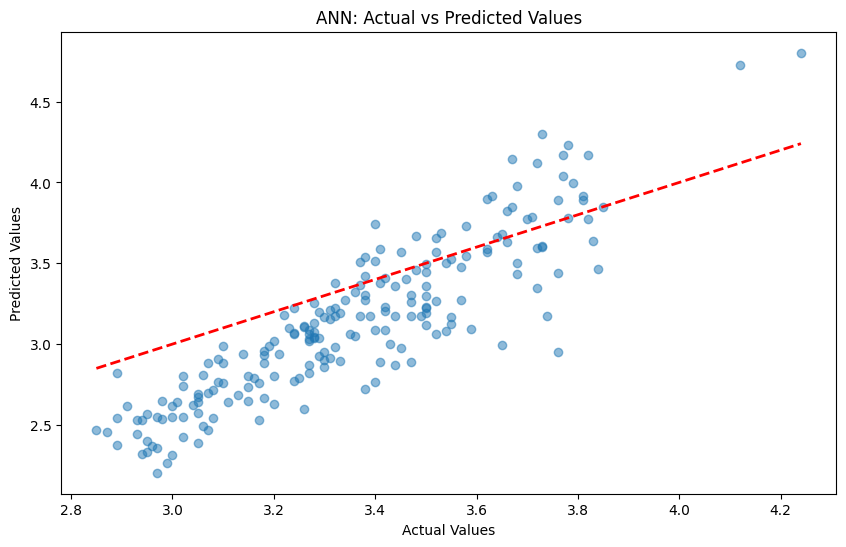

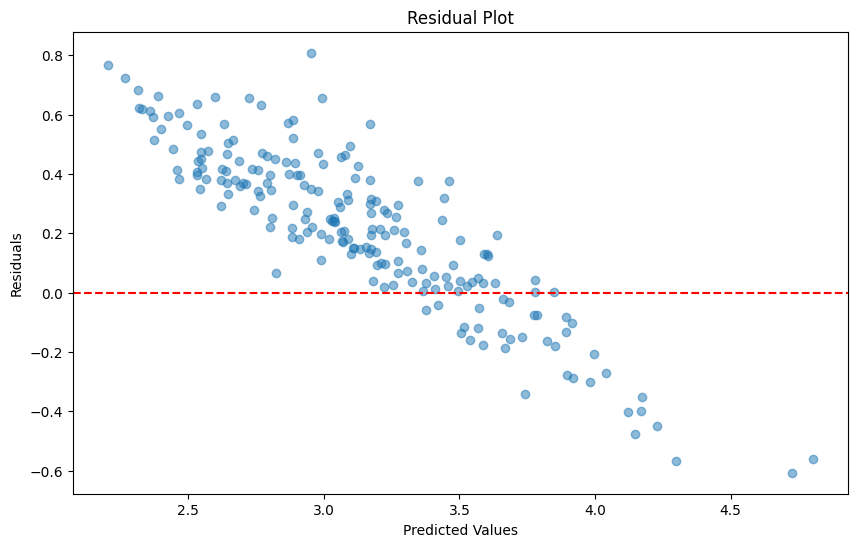

In [5]:
# First, let's handle the TensorFlow warnings without affecting matplotlib
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

# Now proceed with your data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ensure data is in right format and type
X_train_scaled = np.array(X_train_scaled, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test_scaled = np.array(X_test_scaled, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#5. Artificial Neural Network (ANN)

#5.1 Define ANN Architecture with explicit input shape
input_shape = X_train_scaled.shape[1:]
model_ann = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Use a more specific optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

#5.2 Train ANN
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

print("Training ANN...")
history = model_ann.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=True
)

#5.3 Plot training history - MAKE SURE THIS CODE IS INCLUDED
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()  # This line is crucial to display the plot

#5.4 Evaluate ANN
y_pred_ann = model_ann.predict(X_test_scaled, batch_size=32).flatten()

# Metrics
ann_r2 = r2_score(y_test, y_pred_ann)
ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))

print(f"ANN R²: {ann_r2:.3f}")
print(f"ANN MAE: {ann_mae:.3f}")
print(f"ANN RMSE: {ann_rmse:.3f}")

#5.5 Additional visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ANN: Actual vs Predicted Values')
plt.show()

#5.6 Residual plot
residuals = y_test - y_pred_ann
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ann, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [6]:
#6. Model Comparison
results = pd.DataFrame({
    'Model': ['MLR', 'ANN'],
    'R²': [mlr_r2, ann_r2],
    'MAE': [mlr_mae, ann_mae],
    'RMSE': [mlr_rmse, ann_rmse]
})

print(results)

  Model        R²       MAE      RMSE
0   MLR  0.929786  0.050523  0.071074
1   ANN -0.694996  0.294644  0.349208


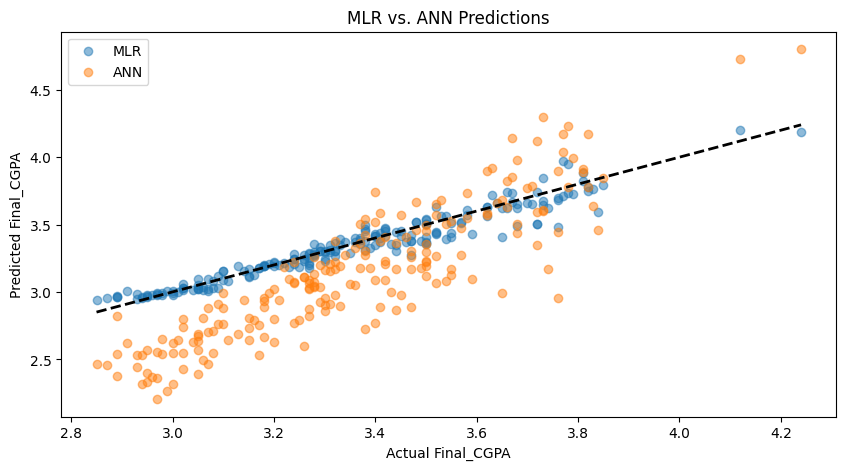

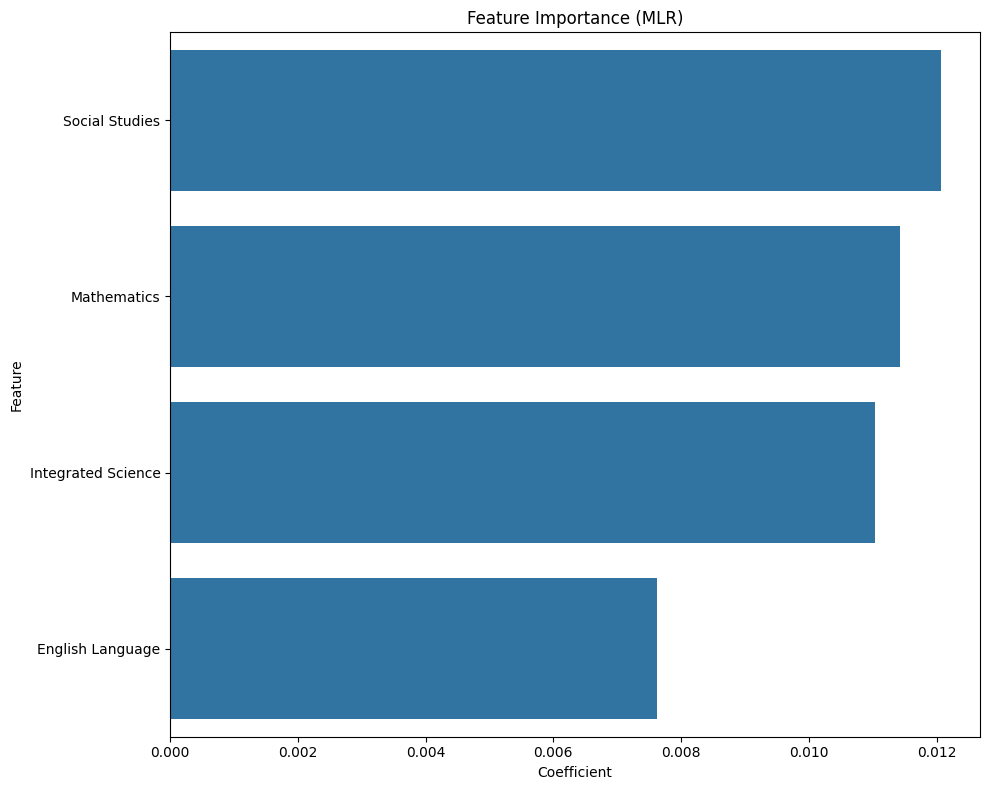

In [7]:
#7. Visualization

#7.1 Actual vs. Predicted (MLR vs. ANN)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_mlr, alpha=0.5, label='MLR')
plt.scatter(y_test, y_pred_ann, alpha=0.5, label='ANN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Final_CGPA')
plt.ylabel('Predicted Final_CGPA')
plt.title('MLR vs. ANN Predictions')
plt.legend()
plt.show()

#7.2 Feature Importance (MLR Coefficients)
# If you performed feature selection, you might need to identify which features were kept
# Check if you have a feature selection step in your code

# Option: Use the features from your final MLR model
# The model_sm.params contains all features used in the final model (including const)
coef_df = pd.DataFrame({
    'Feature': model_sm.params.index[1:],  # Exclude 'const'
    'Coefficient': model_sm.params[1:]     # Exclude intercept value
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (MLR)')
plt.tight_layout()
plt.show()

In [8]:
# 8. Saving Models
import joblib
import os

try:
    # Try to get feature names from reduced dataset if it exists
    mlr_feature_names = X_train_reduced.columns.tolist()
    print("Using X_train_reduced features")
except NameError:
    # If reduced dataset doesn't exist, get features from model parameters
    mlr_feature_names = [feature for feature in model_sm.params.index if feature != 'const']
    print("Using features from MLR model parameters")

# Save MLR model
mlr_model_data = {
    'model': model_sm,
    'feature_names': mlr_feature_names,
    'scaler': scaler,
    'model_type': 'MLR'
}
joblib.dump(mlr_model_data, 'mlr_model.pkl')

# Save ANN model metadata (scaler, shape, etc.)
ann_model_data = {
    'scaler': scaler,
    'input_shape': X_train_scaled.shape[1],
    'model_type': 'ANN'
}
joblib.dump(ann_model_data, 'ann_model.joblib')

# Save Keras model separately in the new recommended format
model_ann.save('ann_model.keras')  # No warning anymore

# Verify files were created
if all(os.path.exists(f) for f in ['mlr_model.pkl', 'ann_model.joblib', 'ann_model.keras']):
    print("All model files created successfully!")
else:
    print("⚠ Some model files might not have been created")

print(f"\nModel details:")
print(f"MLR features: {len(mlr_feature_names)} features")
print(f"ANN input shape: {X_train_scaled.shape[1]} dimensions")
print(f"Scaler type: {type(scaler).__name__}")


Using features from MLR model parameters
All model files created successfully!

Model details:
MLR features: 4 features
ANN input shape: 1013 dimensions
Scaler type: MinMaxScaler
